# CNN sur CIFAR-10 (Classes multiples)

Voyons un autre exemple d'utilisation de Keras et de construction d'un CNN. Nous utiliserons un autre ensemble de données célèbre, l'ensemble de données CIFAR-10 qui comprend 10 types d'images différents.

In [ ]:
import pandas as pd
import numpy as np

-----

## Les Données

CIFAR-10 est un ensemble de 50 000 images d'entraînement en couleur 32x32, réparties en 10 catégories, et 10 000 images de test.

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt

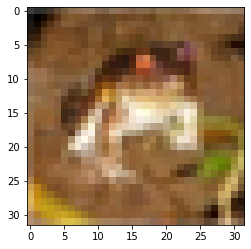

In [ ]:
# Grenouille
plt.imshow(x_train[0])

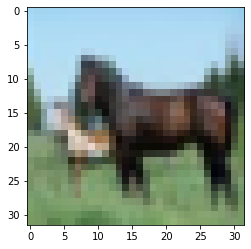

In [ ]:
# Cheval
plt.imshow(x_train[12])

## Pré-traitement des Données

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
x_train.max()

255

In [ ]:
x_train = x_train/225

In [ ]:
x_test = x_test/255

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
y_cat_train = to_categorical(y_train,10)

In [ ]:
y_cat_train.shape

(50000, 10)

In [ ]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_test = to_categorical(y_test,10)

----------
## Construction du Modèle

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

## Premier set de couches

# Couche convolutive
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# Couche de Pooling
model.add(MaxPool2D(pool_size=(2, 2)))

## Second set de couches

# Couche convolutive
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# Couche de Pooling
model.add(MaxPool2D(pool_size=(2, 2)))

# Images applaties de 28 par 28 à 764 avant la couche finale
model.add(Flatten())

# 256 neurones dans la couche cachée dense (Vous pouvez changer ce nombre de neurones)
model.add(Dense(256, activation='relu'))

# La dernière est le classificateur, donc 10 classes possibles
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 58s 37ms/step - loss: 1.5094 - accuracy: 0.4580 - val_loss: 1.3111 - val_accuracy: 0.5299
Epoch 2/15
1563/1563 [==============================] - 57s 37ms/step - loss: 1.1523 - accuracy: 0.5989 - val_loss: 1.1373 - val_accuracy: 0.6084
Epoch 3/15
1563/1563 [==============================] - 57s 37ms/step - loss: 1.0037 - accuracy: 0.6530 - val_loss: 1.3609 - val_accuracy: 0.5591
Epoch 4/15
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9041 - accuracy: 0.6880 - val_loss: 1.0149 - val_accuracy: 0.6510
Epoch 5/15
1563/1563 [==============================] - 57s 37ms/step - loss: 0.8250 - accuracy: 0.7168 - val_loss: 1.1219 - val_accuracy: 0.6292
Epoch 6/15
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7633 - accuracy: 0.7387 - val_loss: 0.9568 - val_accuracy: 0.6757
Epoch 7/15
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7093 - accuracy: 0.7589 - val_loss: 0.9522 -

In [ ]:
model.save('cifar_10epochs.h5')

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.509439,0.45798,1.311055,0.5299
1,1.152330,0.59886,1.137325,0.6084
2,1.003657,0.65298,1.360907,0.5591
3,0.904130,0.68804,1.014931,0.6510
4,0.824994,0.71676,1.121859,0.6292


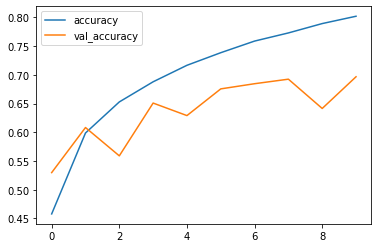

In [ ]:
losses[['accuracy','val_accuracy']].plot()

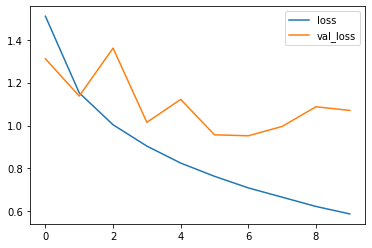

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.07038414478302, 0.6967999935150146]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = np.argmax(model.predict(x_test), axis=1)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1000
           1       0.78      0.84      0.81      1000
           2       0.57      0.61      0.59      1000
           3       0.52      0.49      0.50      1000
           4       0.66      0.69      0.68      1000
           5       0.65      0.51      0.57      1000
           6       0.73      0.81      0.77      1000
           7       0.81      0.71      0.76      1000
           8       0.74      0.82      0.78      1000
           9       0.79      0.74      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



In [ ]:
confusion_matrix(y_test,predictions)

array([[729,  20,  42,  12,  17,   7,  11,   6, 116,  40],
       [ 23, 839,   8,   7,   0,   3,  10,   4,  45,  61],
       [ 75,   9, 614,  49,  74,  50,  68,  26,  19,  16],
       [ 32,  17, 103, 491,  78, 112,  89,  34,  27,  17],
       [ 23,   6,  99,  45, 695,  28,  48,  41,   9,   6],
       [ 16,  11,  82, 215,  51, 511,  45,  46,  13,  10],
       [  7,  11,  57,  44,  36,  17, 815,   3,   5,   5],
       [ 32,   7,  35,  56,  76,  44,  17, 710,   8,  15],
       [ 51,  42,  19,  14,  14,   2,   8,   1, 824,  25],
       [ 34, 115,  13,  16,   6,  10,  10,   9,  47, 740]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


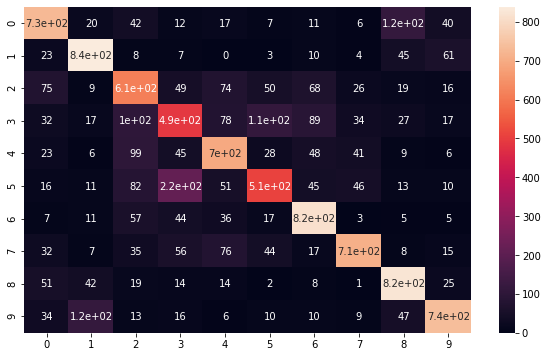

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

## Prédiction d'une image donnée

In [ ]:
my_image = x_test[16]

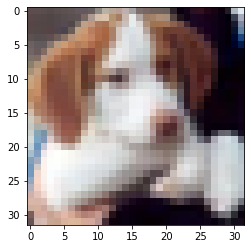

In [ ]:
plt.imshow(my_image);

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_image.reshape(1,32,32,3)),axis=1)

array([5])

In [ ]:
# 5 est DOG (chien)
# https://www.cs.toronto.edu/~kriz/cifar.html